# Higgs Portal Constraints

This notebook contains the constraints on the Higgs portal model in `Hazma` from future telescopes.

## Computing the constraints

In [1]:
%load_ext autoreload
%autoreload 2
from constraints import Constraints
import numpy as np
import pickle

In [2]:
n = 100

### Heavy mediator

In [3]:
mxs_heavy_med = np.geomspace(0.1, 250, n)
mss_heavy_med = 1.5 * mxs_heavy_med
c_heavy_med = Constraints(mxs_heavy_med[0], mss_heavy_med[0], 1.0, 1e-3)

In [6]:
constraints_heavy_med = c_heavy_med.compute_telescope_constraints(mxs_heavy_med, mss_heavy_med)

In [7]:
constraints_heavy_med['relic_density'] = c_heavy_med.compute_relic_density_contours(
    mxs_heavy_med, mss_heavy_med
)
constraints_heavy_med['cmb'] = c_heavy_med.compute_cmb_constraints(
    mxs_heavy_med, mss_heavy_med
)

In [56]:
constraints_heavy_med['mx'] = mxs_heavy_med
constraints_heavy_med['ms'] = mss_heavy_med
# Save it
with open('data/constraints_heavy_med.p', 'wb') as f:
    pickle.dump(constraints_heavy_med, f)

In [126]:
# Compute pheno constraints
svs = np.geomspace(1e-40, 1e-24, 90)
mx_mg, sv_mg = np.meshgrid(mxs_heavy_med, svs)
ms_mg = mx_mg * mss_heavy_med / mxs_heavy_med
pheno_compat_heavy_med = c_heavy_med.consistent_with_pheno_constraints(
    mx_mg, ms_mg, sv_mg
)

In [131]:
# Save
pheno_constraints_heavy_med = {
    "mx_mg": mx_mg,
    "sv_mg": sv_mg,
    "compat": pheno_compat_heavy_med
}
with open('data/pheno_constraints_heavy_med.p', 'wb') as f:
    pickle.dump(pheno_constraints_heavy_med, f)

### Light mediator

In [4]:
mxs_light_med = np.geomspace(0.1, 1e3, n)
mss_light_med = 0.5 * mxs_light_med
c_light_med = Constraints(mxs_light_med[0], mss_light_med[0], 1.0, 1e-3)

In [10]:
constraints_light_med = c_light_med.compute_telescope_constraints(mxs_light_med, mss_light_med)

In [11]:
constraints_light_med['relic_density'] = c_light_med.compute_relic_density_contours(
    mxs_light_med, mss_light_med
)
constraints_light_med['cmb'] = c_light_med.compute_cmb_constraints(
    mxs_light_med, mss_light_med
)

In [55]:
constraints_light_med['mx'] = mxs_light_med
constraints_light_med['ms'] = mss_light_med
# Save it
with open('data/constraints_light_med.p', 'wb') as f:
    pickle.dump(constraints_light_med, f)

## Plots

In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from constraints import Constraints

In [2]:
# Load constraints
with open('data/constraints_heavy_med.p', 'rb') as f:
    df_heavy_med = pd.DataFrame(pickle.load(f))

with open('data/pheno_constraints_heavy_med.p', 'rb') as f:
    pheno_constraints_heavy_med = pickle.load(f)

with open('data/constraints_light_med.p', 'rb') as f:
    df_light_med = pd.DataFrame(pickle.load(f))

# Condense the old telescopes
to_condense_telescopes = ["comptel", "egret", "fermi", "integral"]
df_heavy_med['past_telescopes'] = np.min([df_heavy_med[tel] for tel in to_condense_telescopes], axis=0)
df_light_med['past_telescopes'] = np.min([df_light_med[tel] for tel in to_condense_telescopes], axis=0)

# Drop condensed columns
df_heavy_med_condensed = df_heavy_med.drop(to_condense_telescopes, axis=1)
df_light_med_condensed = df_light_med.drop(to_condense_telescopes, axis=1)

# For computing curves of constant (gsxx, stheta)
constrainer = Constraints(100., 1e3, 1, 1)

In [3]:
fig_dim = 4
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

/Users/acoogan/.pyenv/versions/3.8.6/envs/hazma-3.8.6/lib/python3.8/site-packages/numpy/ma/core.py:6845: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


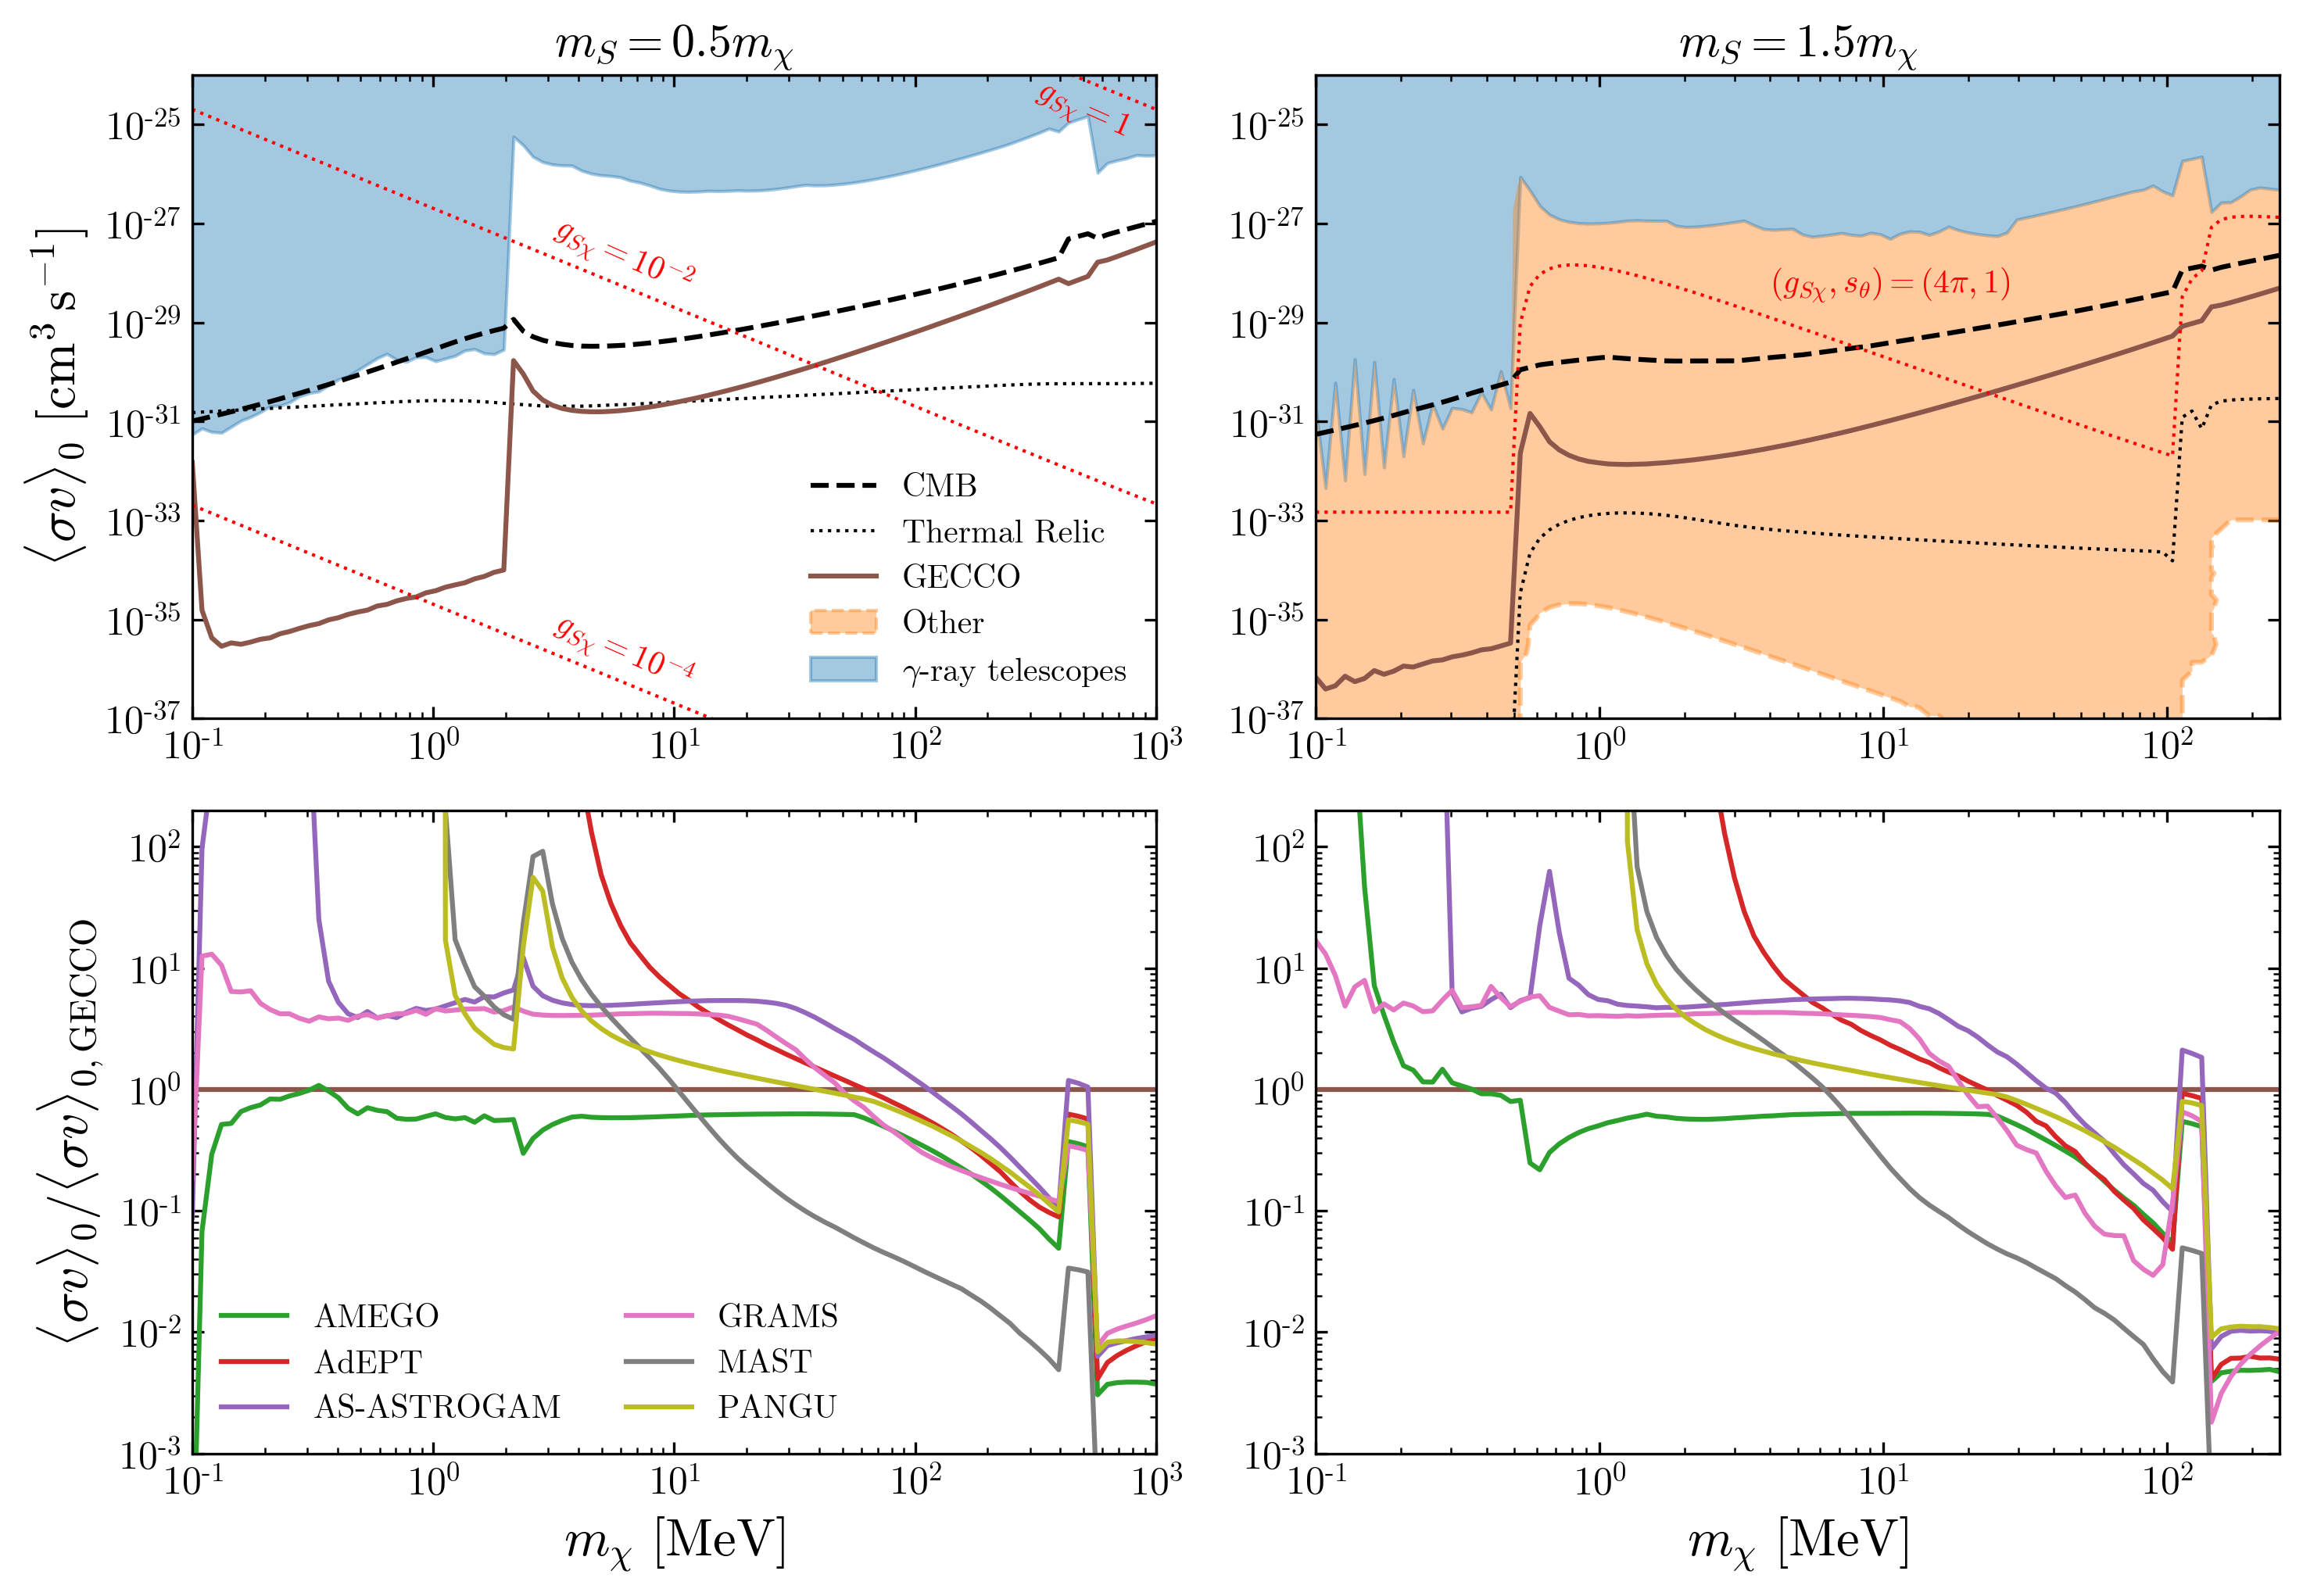

In [4]:
dfs = [df_light_med_condensed, df_heavy_med_condensed]
y_min, y_max = 1e-37, 1e-24

fig, axes = plt.subplots(2, 2, dpi=150, figsize=(10, 7))

for col, df in enumerate(dfs):
    for row, rescaling in enumerate([1, df["gecco"]]):
        ax = axes[row, col]
        if row == 0:
            ax.plot(
                df['mx'], 
                df['cmb'] / rescaling, 
                label=r'CMB',
                linestyle="--",
                color="black",
            )

            ax.plot(
                df['mx'], 
                df['relic_density'] / rescaling, 
                label=r'Thermal Relic',
                linestyle=":",
                color="black",
                linewidth=1,
            )

            ax.fill_between(
                df['mx'], 
                df['past_telescopes'] / rescaling, 
                y_max / rescaling, 
                label=r'$\gamma$-ray telescopes',
                linestyle="-",
                color=colors[0],
                alpha=0.4
            )

        ax.plot(
            df['mx'],     
            df['gecco'] / rescaling,  
            label='GECCO' if row == 0 else None,
            linestyle="-",
            color=colors[5],
        )
        
        if row == 1:
            ax.plot(
                df['mx'],     
                df['amego'] / rescaling,  
                label='AMEGO',
                linestyle="-",
                color=colors[2],
            )
            ax.plot(
                df['mx'],     
                df['adept'] / rescaling,  
                label='AdEPT',
                linestyle="-",
                color=colors[3],
            )
            ax.plot(
                df['mx'],     
                df['all-sky astrogam'] / rescaling,  
                label='AS-ASTROGAM',
                linestyle="-",
                color=colors[4],
            )
            ax.plot(
                df['mx'],     
                df['grams'] / rescaling,  
                label='GRAMS',
                linestyle="-",
                color=colors[6],
            )
            ax.plot(
                df['mx'],     
                df['mast'] / rescaling,  
                label='MAST',
                linestyle="-",
                color=colors[7],
            )
            ax.plot(
                df['mx'],     
                df['pangu'] / rescaling,  
                label='PANGU',
                linestyle="-",
                color=colors[8],
            )

        ax.set_xscale('log')
        ax.set_xlim([np.min(df['mx']), np.max(df['mx'])])
        if row == 0:
            ax.set_yscale('log')
            ax.set_ylim([y_min, y_max])
        else:
            ax.set_yscale('log')
            ax.set_ylim(0.001, 200)

        if row == axes.shape[0] - 1:
            ax.set_xlabel(r'$m_{\chi} \ [\mathrm{MeV}]$',fontsize=16)
        if col == 0 and row == 0:
            ax.set_ylabel(
                r'$\langle\sigma v\rangle_{0} \ [\mathrm{cm}^3 \, \mathrm{s}^{-1}]$',
                fontsize=16
            )
        elif col == 0 and row == 1:
            ax.set_ylabel(
                r'$\langle\sigma v\rangle_{0} / \langle\sigma v\rangle_{0,\mathrm{GECCO}}$',
                fontsize=16
            )
        ax.tick_params("both", top=True, right=True, which="both", direction="in")

# Pheno constraints (heavy mediator only)
cs = axes[0, 1].contour(
    pheno_constraints_heavy_med["mx_mg"],
    pheno_constraints_heavy_med["sv_mg"],
    pheno_constraints_heavy_med["compat"],
    levels=[-1e200, 0],
    colors=[colors[1]],
    linestyles=["--"],
    alpha=0.4
)
_mxs_pheno, _svs_pheno = cs.collections[1].get_paths()[0].vertices.T
axes[0, 1].fill_between(
    _mxs_pheno,
    _svs_pheno,
    np.interp(
        _mxs_pheno,
        df_heavy_med_condensed["mx"],
        df_heavy_med_condensed['past_telescopes']
    ),
    color=colors[1], alpha=0.4, linewidth=0
)
# Proxy artist for legend
axes[0, 0].patches.append(
    plt.Rectangle(
        (0, 0), 0, 0,
        color=colors[1],
        alpha=0.4,
        label="Other",
        linestyle="--"
    )
)

# Cross sections for different coupling values
axes[0, 1].plot(
    df_heavy_med["mx"], constrainer.sv_max(df_heavy_med["mx"], df_heavy_med["ms"]), ":r", linewidth=1
)
for gsxx in [1, 1e-2, 1e-4]:
    axes[0, 0].plot(
        df_light_med["mx"],
        constrainer.sv_max(df_light_med["mx"], df_light_med["ms"], gsxx_max=gsxx),
        ":r",
        linewidth=1,
    )
# Labels
axes[0, 0].text(3e2, 6e-26, r"$g_{S\chi} = 1$", rotation=-24, color="r", fontsize=10, alpha=1)
axes[0, 0].text(3, 4e-29, r"$g_{S\chi} = 10^{-2}$", rotation=-24, color="r", fontsize=10, alpha=1)
axes[0, 0].text(3, 4e-37, r"$g_{S\chi} = 10^{-4}$", rotation=-24, color="r", fontsize=10, alpha=1)
axes[0, 1].text(4, 4e-29, r"$(g_{S\chi}, s_\theta) = (4\pi, 1)$", color="r", fontsize=10)

axes[0, 0].legend(fontsize=10, loc="lower right", frameon=False)
axes[1, 0].legend(fontsize=10, ncol=2, frameon=False)
axes[0, 0].set_title(
    r"$m_S = %.1f m_\chi$" % (df_light_med["ms"][0] / df_light_med["mx"][0])
)
axes[0, 1].set_title(
    r"$m_S = %.1f m_\chi$" % (df_heavy_med["ms"][0] / df_heavy_med["mx"][0])
)

fig.tight_layout()
fig.savefig("figures/higgs_portal.pdf")